In [2]:
#importing all Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"E:\FlipRobo\NLP Projects to do\Micro Credit Project\Data file.csv")
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
data.shape

(209593, 37)

In [5]:
data.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

### Observations:¶
1. Unnamed column can be dropped as it is not necessary for prediction of loan repayment.
2. Also column pcircle can be dropped as it is not necessary for prediction of loan repayment.
3. Column msisdn and pdate are of type object which needs to be convered to float/date type.

In [6]:
# dropping Unnamed:0 columns
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head(5)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [7]:
data.shape

(209593, 36)

In [8]:
# Extract month and year from the date column
data["month"] = pd.to_datetime(data["pdate"], format = "%Y/%m/%d").dt.month

In [9]:
# Encoding columns as part of transformation.
from sklearn.preprocessing import LabelEncoder 
le= LabelEncoder()

data['msisdn'] = le.fit_transform(data['msisdn'])
data.head(5)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,month
0,0,40191,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20,7
1,1,142291,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10,8
2,1,33594,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19,8
3,1,104157,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06,6
4,1,6910,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22,6


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  int32  
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [11]:
# using isnull() function   
if data.isnull() is True:
    print("Null is present")
else:
    print("Null is NOT present")
    
#df.isnull()

Null is NOT present


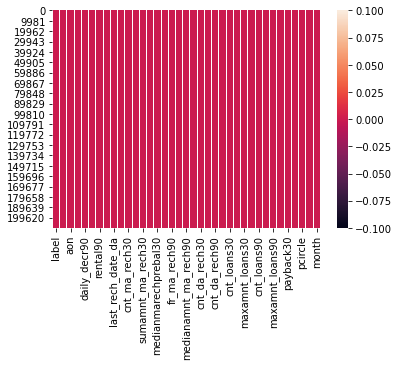

In [12]:
# Checking for null using HeatMap
sns.heatmap(data.isnull())

In [13]:
if data.duplicated() is True:
    print("Rows duplicated")
else:
    print("NO duplicates")

NO duplicates


In [14]:
data.nunique()

label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback3

In [15]:
Total = data.shape[0]
print("Total: ",Total)

loan_Success = data[data['label'] == 1]
loan_Failure = data[data['label'] == 0]

x = len(loan_Failure)/Total
y = len(loan_Success)/Total

print('Loan Failure :',len(loan_Failure))
print('Loan Success :',len(loan_Success))


print('Loan Failure :',x*100,'%')
print('Loan Success :',y*100,'%')

Total:  209593
Loan Failure : 26162
Loan Success : 183431
Loan Failure : 12.482287099282896 %
Loan Success : 87.5177129007171 %


Text(0, 0.5, 'Frequency')

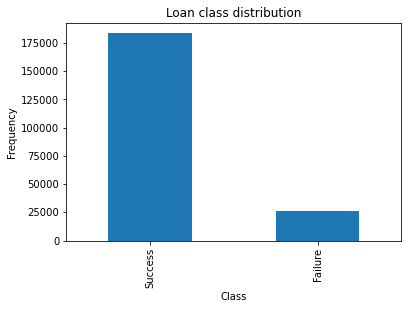

In [16]:
# Let's plot the Transaction class against the Frequency
labels = ['Success','Failure']
classes = pd.value_counts(data['label'], sort = True)
#classes.plot(kind = 'bar', rot=0)
classes.plot(kind = 'bar')
plt.title("Loan class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [17]:
data.describe()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,93100.650179,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,6.797321
std,0.330519,53758.461427,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,0.741435
min,0.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,1.000000,46506.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,93073.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,7.000000
75%,1.000000,139626.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,7.000000
max,1.000000,186242.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,8.000000


##### from the above statistical analysis it is clearly see that there is difference between the 75th percentile and max so this is an indication of the outliers in the dataset

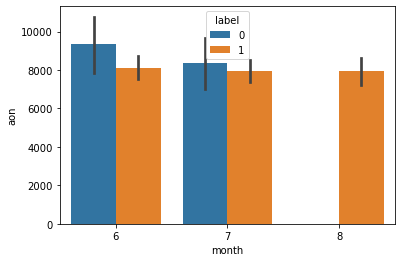

In [18]:
sns.barplot(x='month',y='aon',hue='label',data=data)

##### there are no defaulter in 8th month i.e. August month of 2016 year

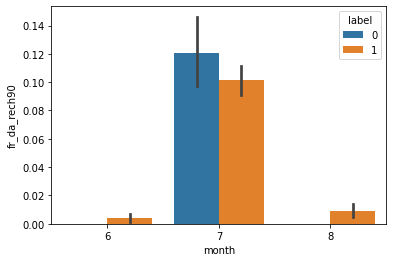

In [19]:
sns.barplot(x='month',y='fr_da_rech90',hue='label',data=data)

##### Frequency of data account recharged in last 90 days is more in month july and least in june. Also in july month data account recharge in those account which are defaulter

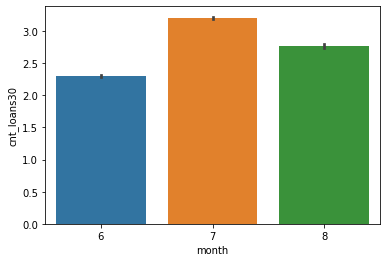

In [20]:
sns.barplot(x='month',y='cnt_loans30',data=data)

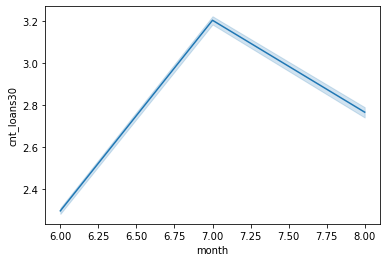

In [21]:
sns.lineplot(x='month',y='cnt_loans30',data=data)

##### Most of the users are taken loan in the month of july and decrease in august month and max count of loan is 1 and 2

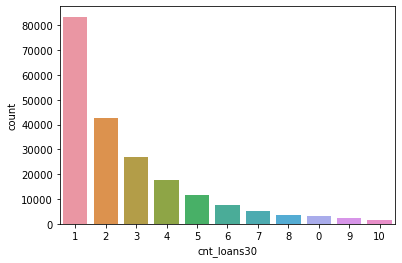

In [22]:
sns.countplot(x='cnt_loans30',data=data,order=data.cnt_loans30.value_counts().iloc[:11].index)

##### In the above countplot most of the user take loan 1,2 and 3 time , these cover 90% of the total data

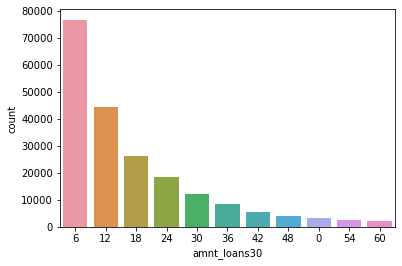

In [23]:
sns.countplot(x='amnt_loans30',order=data.amnt_loans30.value_counts().iloc[:11].index,data=data)

##### These are the total loan amount that user had mostly are 6,12,15,24

In [24]:
#Remove unwanted Columns
data.drop(['msisdn','pcircle','pdate'],axis=1,inplace=True)

In [25]:
data.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6


##### This data set there are negative values which are from the total amount, age which cant be negative.

In [26]:
for colm in data.columns:
    if(data[colm].min()<0):
        print(colm)

aon
daily_decr30
daily_decr90
rental30
rental90
last_rech_date_ma
last_rech_date_da
medianmarechprebal30
medianmarechprebal90


In [27]:
for col in data.columns:
    data[col][data[col] < 0] = 0

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),
 <a list of 34 Text major ticklabel objects>)

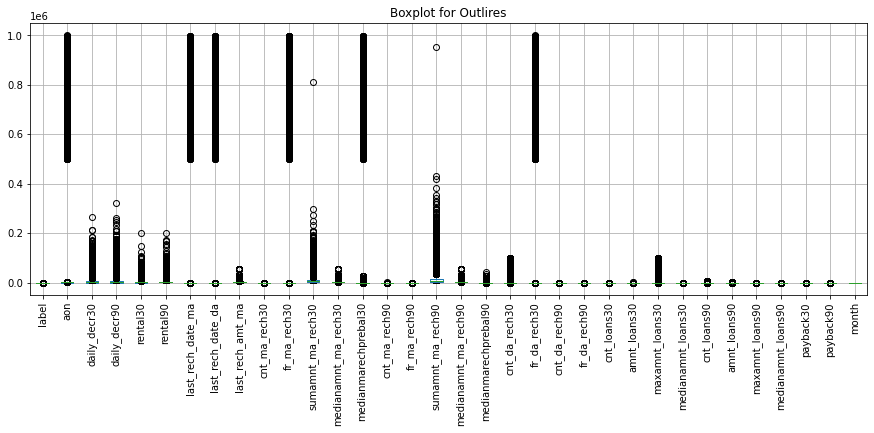

In [28]:
data.plot(kind='box',grid=True,title="Boxplot for Outlires",legend=True,rot=30,figsize=(15,5))
plt.xticks(rotation=90)

In [29]:
#check for Outlier
from scipy.stats import zscore
z_score=abs(zscore(data))
sbi=data[(z_score < 3).all(axis=1)]

In [30]:
data.skew()

label                   -2.270254
aon                     10.392950
daily_decr30             3.946238
daily_decr90             4.252572
rental30                 4.549979
rental90                 4.458345
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779881
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    45.079058
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

In [31]:
for col in data.columns:
    if data.skew().loc[col] > 0.55:
        data[col]=np.log1p(data[col])

In [32]:
data.skew()

label                   -2.270254
aon                      0.924923
daily_decr30            -0.453719
daily_decr90            -0.429730
rental30                -1.320837
rental90                -1.288806
last_rech_date_ma        4.361266
last_rech_date_da        9.853534
last_rech_amt_ma        -2.190580
cnt_ma_rech30           -0.002013
fr_ma_rech30             4.071763
sumamnt_ma_rech30       -1.762898
medianamnt_ma_rech30    -1.867802
medianmarechprebal30     0.280374
cnt_ma_rech90           -0.033410
fr_ma_rech90             0.518606
sumamnt_ma_rech90       -2.023724
medianamnt_ma_rech90    -2.235333
medianmarechprebal90    -0.550959
cnt_da_rech30           13.709136
fr_da_rech30            13.840685
cnt_da_rech90            8.491552
fr_da_rech90            18.083017
cnt_loans30              0.720970
amnt_loans30            -0.026725
maxamnt_loans30          9.512099
medianamnt_loans30       3.995359
cnt_loans90              3.191439
amnt_loans90             0.241660
maxamnt_loans9

[]

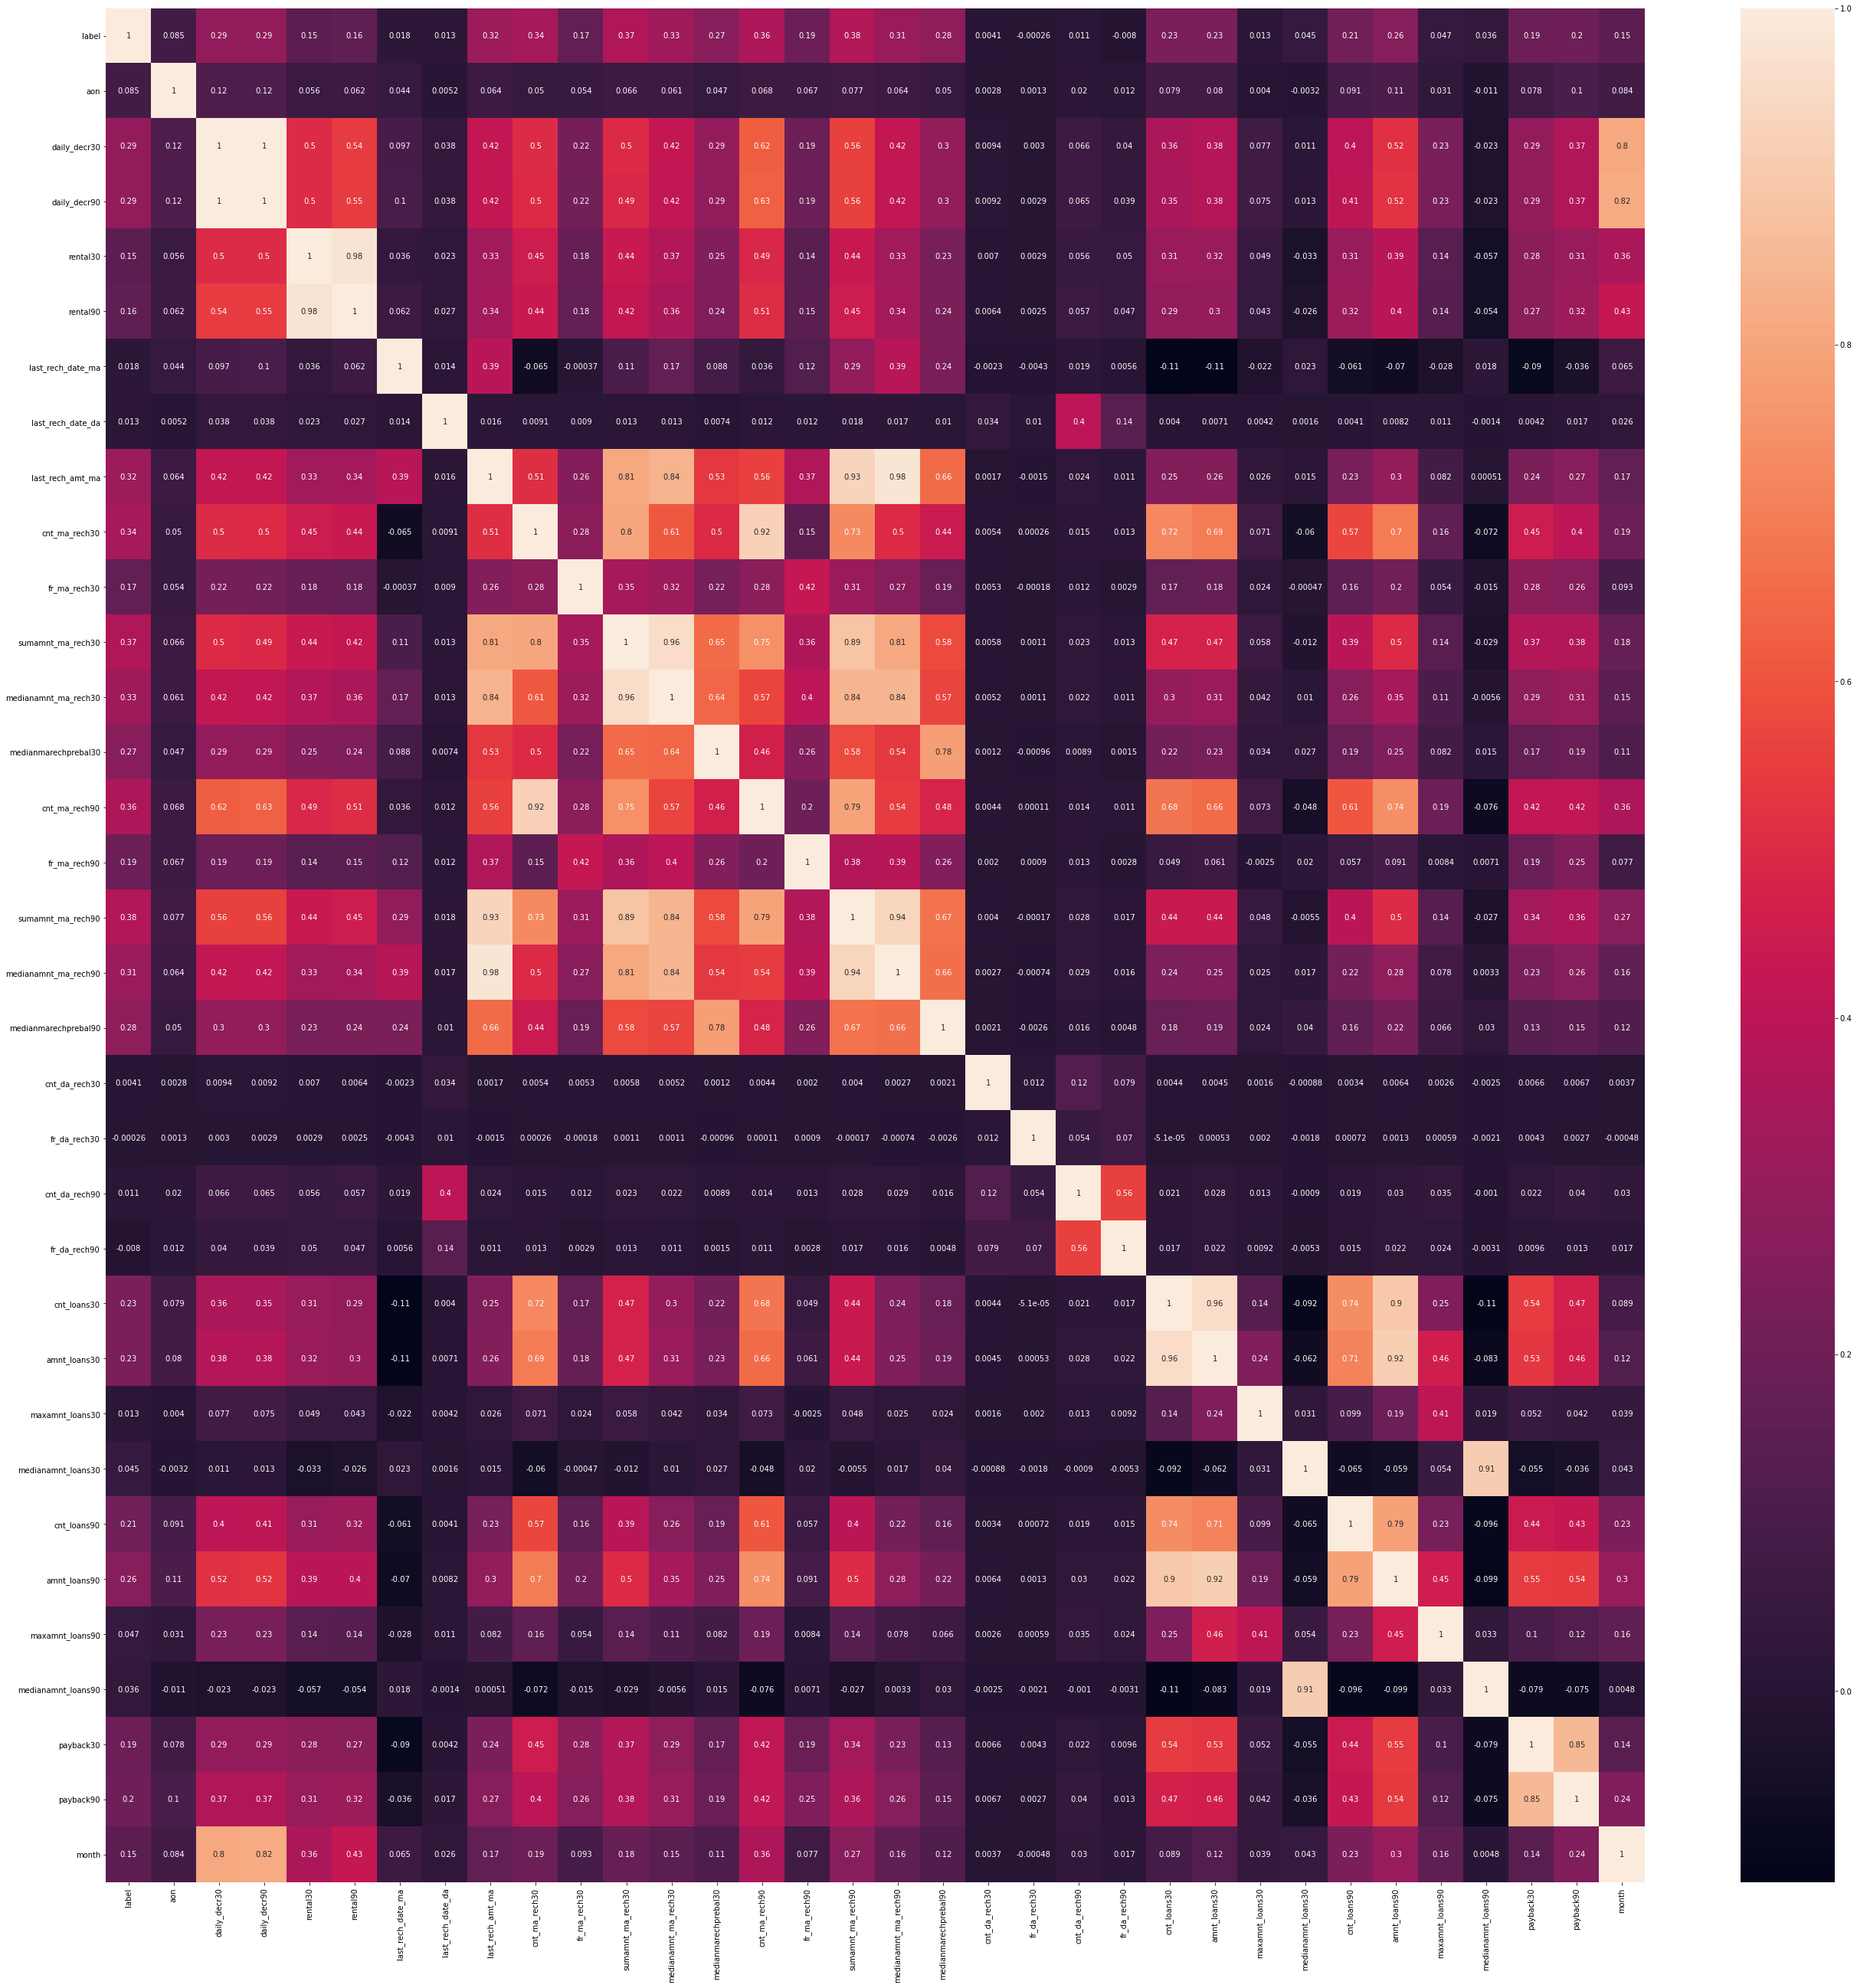

In [33]:
plt.figure(figsize=(45,45))
sns.heatmap(data.corr(),annot=True)
plt.plot()

Features and Target Value

In [34]:
x = data.drop(columns=['label'])
y = data[["label"]]
print(x.shape)
print(y.shape)

(209593, 33)
(209593, 1)


Standardisation

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(x)
x

array([[-0.46789578,  0.56858765,  0.54685919, ...,  2.57940512,
         2.29076126,  0.27336037],
       [ 0.2998416 ,  1.03619689,  1.00744078, ..., -0.85317526,
        -0.93109979,  1.62209905],
       [ 0.07164414,  0.30343618,  0.28400371, ..., -0.85317526,
        -0.93109979,  1.62209905],
       ...,
       [ 0.58148384,  1.02829913,  1.0012959 , ...,  0.77111301,
         0.56136261,  0.27336037],
       [ 1.01009381,  1.04629646,  1.0196374 , ..., -0.85317526,
         1.38246861,  0.27336037],
       [ 0.93718817,  0.69917052,  0.67803591, ..., -0.85317526,
        -0.93109979,  0.27336037]])

Spilt Train and Test

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [37]:
#create best random_state
def rst(mod,x,y):
    max_r=0
    for rn_state in range (25,150):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=rn_state)
        mod.fit(x_train,y_train)
        pred=mod.predict(x_test)
        acs=accuracy_score(pred,y_test)
        f1=f1_score(y_test,pred)
        cnf=confusion_matrix(y_test,pred)
        clr=classification_report(y_test,pred)
        
        fpr,tpr,thresholds=roc_curve(y_test,pred)
        roc_auc=auc(fpr,tpr)

        if acs > max_r:
            max_r=acs
            random_state=rn_state
    print("random_state for mod"," is ",random_state,"which gives accuracy score of: ",max_r)
    
    #print('f1_score: ', f1)
    print('confusion matrix: ',cnf)
    print('classification report: ',clr)
    print("fpr: ",fpr)
    print("tpr: ",tpr)
    print("thresholds: ",thresholds)
    print("roc_auc: ",roc_auc)
    print()
    print('prediction: ',pred)
     

    plt.plot([0,1],[0,1],color='red',linestyle="dashdot")
    plt.plot(fpr,tpr,label="AUC= %0.4f" % roc_auc)
    plt.legend(loc='best',fontsize='medium',shadow=True)
    plt.xlabel("FPR")
    plt.ylabel('TPR')
    plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE',size=15,weight='bold',loc='right')
    plt.show()
    
    return random_state

Logistic Regression

random_state for mod  is  81 which gives accuracy score of:  0.889738859378479
confusion matrix:  [[ 1584  6237]
 [  935 54122]]
classification report:                precision    recall  f1-score   support

           0       0.63      0.20      0.31      7821
           1       0.90      0.98      0.94     55057

    accuracy                           0.89     62878
   macro avg       0.76      0.59      0.62     62878
weighted avg       0.86      0.89      0.86     62878

fpr:  [0.         0.79746835 1.        ]
tpr:  [0.        0.9830176 1.       ]
thresholds:  [2 1 0]
roc_auc:  0.5927746227557493

prediction:  [1 1 1 ... 1 1 1]


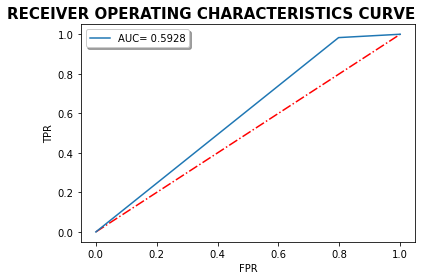

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs")
lr_g=rst(lr,x,y)

In [39]:
#Cross Validation
accuracy_score_1=cross_val_score(lr,x,y,scoring='accuracy',cv=60).mean()
accuracy_score_1

0.8868091089912812

DecisionTree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_param={'criterion':['gini','entropy'],'max_depth':range(3,10)}
dt_g=GridSearchCV(dt,dt_param,cv=15)
dt_g.fit(x,y)
dt_g.best_params_

{'criterion': 'gini', 'max_depth': 9}

random_state for mod  is  123 which gives accuracy score of:  0.9152008651674671
confusion matrix:  [[ 3397  4424]
 [ 1153 53904]]
classification report:                precision    recall  f1-score   support

           0       0.75      0.43      0.55      7821
           1       0.92      0.98      0.95     55057

    accuracy                           0.91     62878
   macro avg       0.84      0.71      0.75     62878
weighted avg       0.90      0.91      0.90     62878

fpr:  [0.         0.56565657 1.        ]
tpr:  [0.         0.97905807 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.7067007507187684

prediction:  [1 1 1 ... 1 1 1]


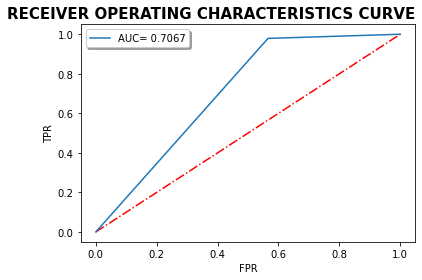

In [41]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=9)
dtc=rst(dt,x,y)

In [42]:
#Cross Validation
accuracy_score_3=cross_val_score(dt,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_3

0.9132270870354299

GaussianNB

random_state for mod  is  95 which gives accuracy score of:  0.8036356118197143
confusion matrix:  [[ 5188  2633]
 [ 9830 45227]]
classification report:                precision    recall  f1-score   support

           0       0.35      0.66      0.45      7821
           1       0.94      0.82      0.88     55057

    accuracy                           0.80     62878
   macro avg       0.65      0.74      0.67     62878
weighted avg       0.87      0.80      0.83     62878

fpr:  [0.         0.33665772 1.        ]
tpr:  [0.         0.82145776 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.7424000227756196

prediction:  [1 1 1 ... 1 1 1]


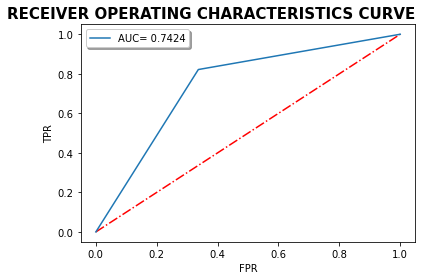

In [43]:
nb=GaussianNB()
gnb=rst(nb,x,y)

In [44]:
#Cross Validation
accuracy_score_4=cross_val_score(nb,x,y,scoring='accuracy',cv=100).mean()
accuracy_score_4

0.7994494548087961

In [46]:
import joblib
joblib.dump(dt,"Micro-Credit.pkl")

['Micro-Credit.pkl']